In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

3. Dla temp 25^o C wykonać serię charakterystyk dla różnych natężeń światła, aby prąd zwarcia zmniejszał się o czynnik 2

$\{0,125,250,500,1000\}$, saved in `light/`

In [2]:
light = {}
light['0'] = pd.read_csv("in/light/light0", sep='\s+')
light['125'] = pd.read_csv("in/light/light125", sep='\s+')
light['250'] = pd.read_csv("in/light/light250", sep='\s+')
light['500'] = pd.read_csv("in/light/light500", sep='\s+')
light['1000'] = pd.read_csv("in/light/light1000", sep='\s+')

light['0']

,U,I
0,-0.10,-2.955678e-09
1,-0.09,3.577534e-11
2,-0.08,1.806227e-09
3,-0.07,-4.237729e-09
4,-0.06,4.187179e-09
...,...,...
95,0.85,1.633614e-02
96,0.86,1.774029e-02
97,0.87,1.951074e-02
98,0.88,2.079280e-02


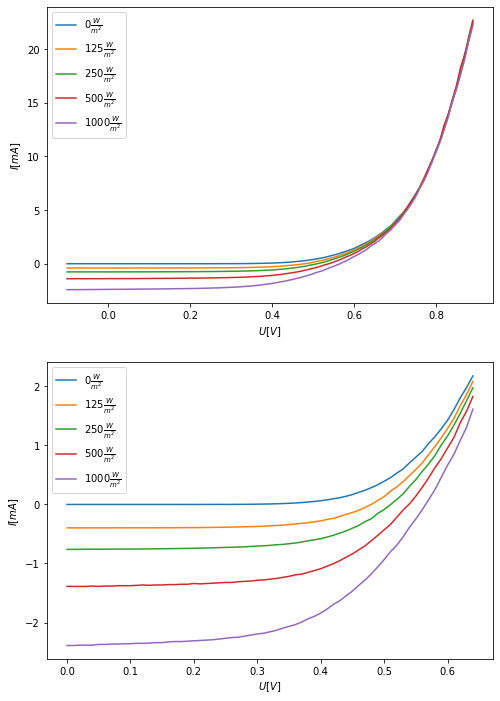

In [3]:

fig, ax = plt.subplots(2,1, figsize =(8,12))

for key in light:
    x = light[key]["U"]
    y = light[key]["I"]
    ax[0].plot(x,1000*y, label=(key + r'$\frac{W}{m^2}$'))
    lo, hi = (10,-25)
    ax[1].plot(x.iloc[lo:hi],1000*y.iloc[lo:hi], label=(key + r'$\frac{W}{m^2}$'))

ax[0].set_xlabel(r'$U[V]$')
ax[0].set_ylabel(r'$I[mA]$')
ax[0].legend()

ax[1].set_xlabel(r'$U[V]$')
ax[1].set_ylabel(r'$I[mA]$')
ax[1].legend()

plt.savefig('out/img/charakterystyka_light.jpg', dpi = 450)

plt.show()

4. Obliczyć wydajność ogniwa dla różnych natężeń światła, zakładając
proporcjonalność między Isc a natężeniem światła. Wyciągnąć wnioski dotyczące
działania ogniwa przy słabszym oświetleniu.

In [4]:
params = pd.DataFrame()
params['intensity'] = [int(x) for x in light]
#fancy odczytywanie z wykresu
U_oc = []
for x in light:
    y = light[x].copy()
    y['I'] = y['I'].abs()
    minimizing_abs_I = y.loc[y['I'] == y["I"].min()]
    U_oc.append(float(minimizing_abs_I['U']))
params['Uoc'] = U_oc

In [5]:
I_sc = []
for x in light:
    y = light[x].copy()
    y['U'] = y['U'].abs()
    U_min = y["U"].min()
    minimizing_abs_U = y.loc[y['U'] == y["U"].min()]
    I_sc.append(-float(-minimizing_abs_U['I']))
params['Isc'] = I_sc

In [6]:
I_mp = []
U_mp = []
for x in light:
    y = light[x].copy()
    y['P'] = (y['U'] * y['I']).abs()
    max_power = y.loc[y['P'] == y["P"][0:40].max()]
    I_mp.append(float(max_power['I']))
    U_mp.append(float(max_power['U']))
params['Imp'] = I_mp
params['Ump'] = U_mp

In [7]:
_A = 0.5e-5 # m**2
params['light_P'] = params['intensity']*_A
params['max_power'] = (params['Imp']*params['Ump'])
params['FF'] = (params['Imp']*params['Ump'])/(params['Isc']*params['Uoc'])
params['eta'] = ( (params['Imp']*params['Ump'])/params['light_P'] ).abs()
params.to_csv('out/csv/params_light.csv', index = False)
params

,intensity,Uoc,Isc,Imp,Ump,light_P,max_power,FF,eta
0,0,-0.09,-4.542979e-09,0.000003,0.29,0.000000,0.000001,2456.079595,inf
1,125,0.48,-3.962534e-04,-0.000375,0.29,0.000625,-0.000109,0.572487,0.174221
2,250,0.51,-7.610871e-04,-0.000710,0.29,0.001250,-0.000206,0.530732,0.164805
3,500,0.54,-1.388364e-03,-0.001297,0.29,0.002500,-0.000376,0.501615,0.150427
4,1000,0.57,-2.389585e-03,-0.002213,0.29,0.005000,-0.000642,0.471077,0.128327


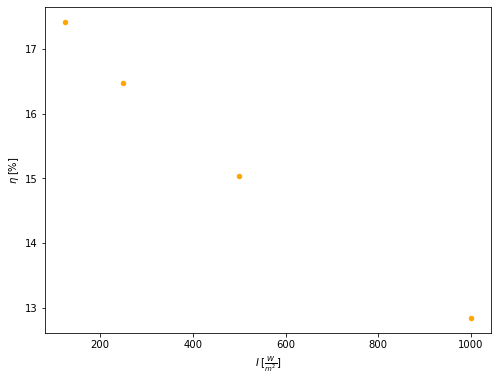

In [8]:
plot_params = params[1:]

plt.figure(figsize=(8,6))

dotcolor = 'orange'
dotsize = 20
plt.scatter(plot_params['intensity'], plot_params['eta']*100, s=dotsize, color = dotcolor)

plt.xlabel(r'$I \; [\frac{W}{m^2}]$')
plt.ylabel(r'$\eta \; [\%]$')

plt.savefig('out/img/wyk_eta_od_I.jpg', dpi=350)

plt.show()


5. Porównać ciemną charakterystykę z jasnymi i wyciągnąć wnioski dotyczące
„zasady superpozycji” dla badanego ogniwa.